# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [2]:
haberman_data = pd.read_csv("haberman.csv")

***Check out head of data***

In [3]:
haberman_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [4]:
labels = ['age', 'op_yr', 'ax', 'status']


In [5]:
haberman_data = pd.read_csv('haberman.csv', names = labels)
haberman_data.head()

,age,op_yr,ax,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***shape of the dataset***

In [9]:
haberman_data.shape

(306, 4)

***Check out the status column and see how it is classified***

In [10]:
haberman_data['status'].value_counts()

survived        225
Not_survived     81
Name: status, dtype: int64

***Replace the status values***

1 == Survived

2 == Not_survived

In [11]:
haberman_data['status'] = haberman_data['status'].map({1:'survived', 2:'Not_survived'})

***Print out the percentage of data classified***

***Observation:***
input your observation below

*The data is not balanced,the percentage of people who survived the surgery is much more than those who did not survive. 

* 

***Check the description of the data***

In [12]:
haberman_data.describe()

,age,op_yr,ax
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

In [17]:
sns.countplot(haberman_data,hue = 'age' , size = 0.5)

ValueError: Could not interpret input 'age'

***Hint: Use seaborn FacetGrid***

C:\Users\Abdulkabir\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


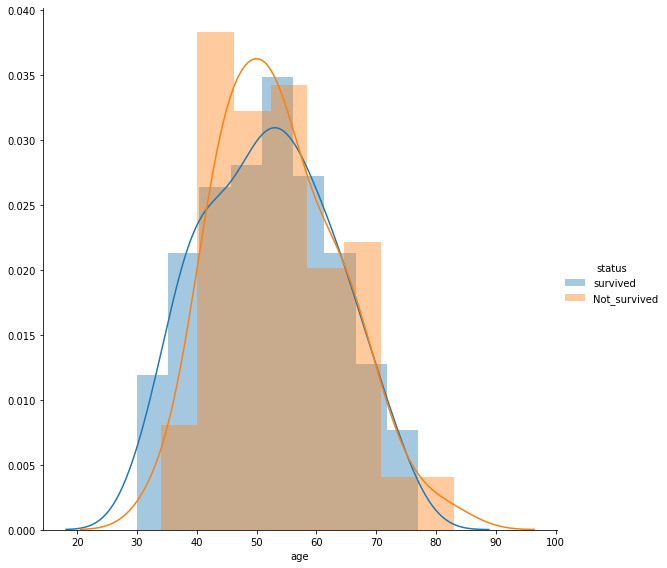

In [15]:
sns.FacetGrid(haberman_data,hue = "status", size = 8)\
.map(sns.distplot, 'age')\
.add_legend()

***Observation:*** input your observation below

* the histogram bars overlapped each other,but age 40-60 has the chances of not surviving.
* the people less than age 40 are more likely to survive

***Reproduce this figures***

Text(0.5, 0, 'Year  of Operation')

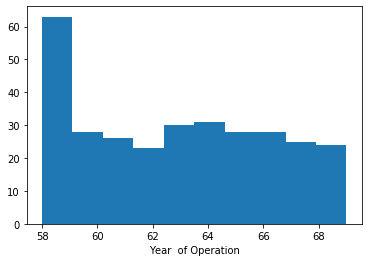

***Hint: Use seaborn FacetGrid***

C:\Users\Abdulkabir\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


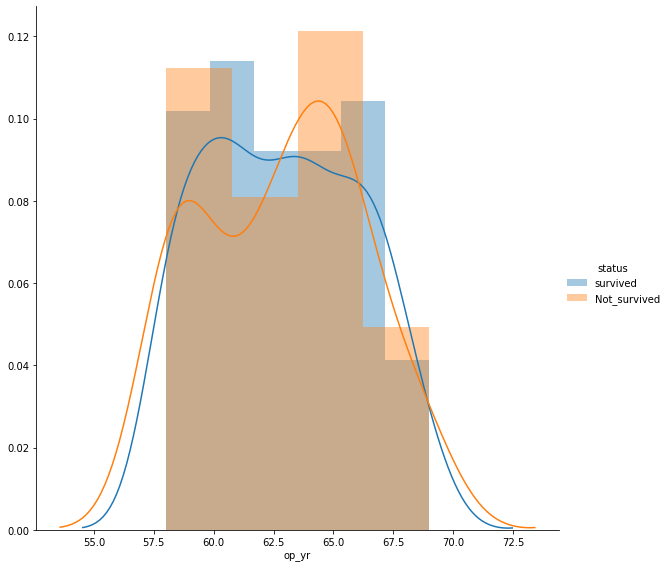

In [17]:
sns.FacetGrid(haberman_data,hue = "status", size = 8)\
.map(sns.distplot, 'op_yr')\
.add_legend()

***Observation:*** input your observation below

* people whose operation year were btw the age of 63-66 died most.
* people whose operation year were btw the age of 60-61.5 died most.
* 

***Reproduce the following figures***

Text(0.5, 0, 'Axil Nodes')

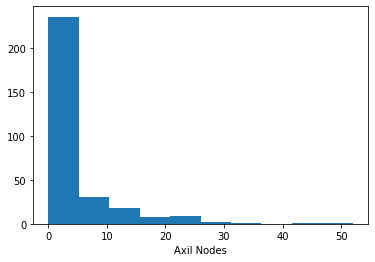

C:\Users\Abdulkabir\anaconda3\anaconda4\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


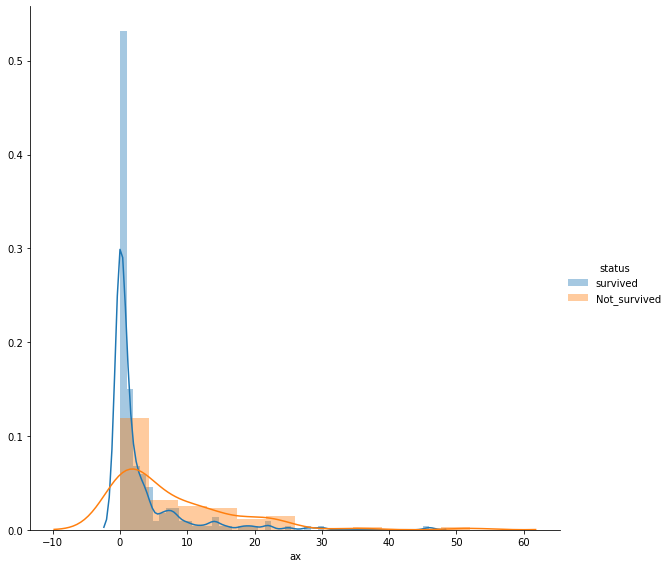

In [16]:
sns.FacetGrid(haberman_data,hue = "status", size = 8)\
.map(sns.distplot, 'ax')\
.add_legend()

***Observation:*** input your observation below

* patients having 0 axil nodes are more likely to survive.
* 

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [17]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survived"]
haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [18]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [19]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [20]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [21]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

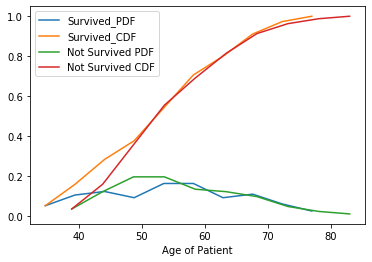

In [22]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [50]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data['op_yr'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [51]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data['op_yr'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [52]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Survived : [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]

Bin Edges Not Survived :[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF Not Survived : [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]



[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


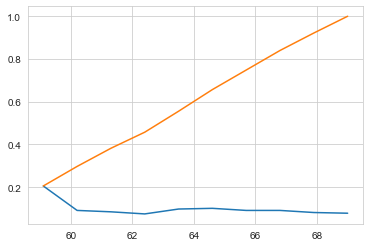

In [44]:
counts, bin_edges = np.histogram(haberman_data['op_yr'],bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

***Observation :*** Input your answer below

* 

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

Bin Edges Survived : [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

PDF Survived : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edges Not Survived :[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF Not Survived : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]



[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


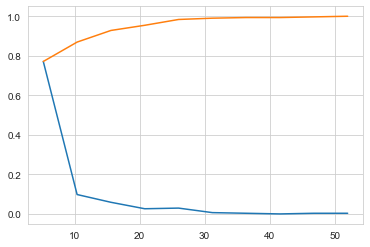

In [43]:
counts, bin_edges = np.histogram(haberman_data['ax'],bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

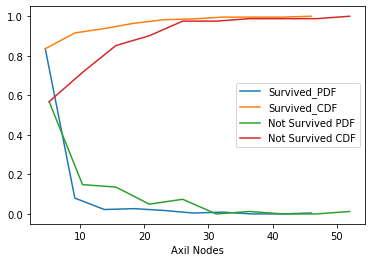

***Observation :*** Input your answer below

* orange line shows there is 85% chance of long survival if axillary nodes detected are < 5
* 

## Box Plot

***Reproduce the following Images***

<function matplotlib.pyplot.show(*args, **kw)>

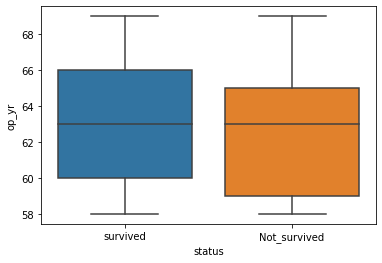

In [27]:
sns.boxplot(x = 'status' , y = 'op_yr' , data = haberman_data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

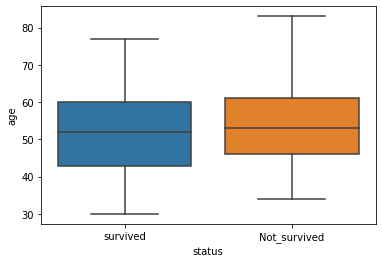

In [26]:
sns.boxplot(x = 'status' , y = 'age' , data = haberman_data)
plt.show

***Observation :*** Input Your answer below

* 
* 
* 

<function matplotlib.pyplot.show(*args, **kw)>

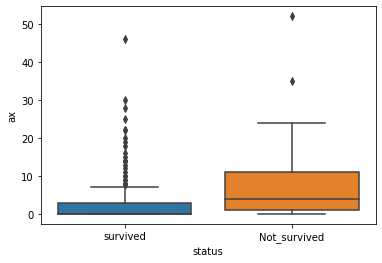

In [24]:
sns.boxplot(x = 'status' , y = 'ax' , data = haberman_data)
plt.show

***Observation :*** Input Your answer below

* the more the number of axil nodes ,the more patients likely to not_survive.
* patient who had axil from 1 to 24 are the majority of patient who ddidnt survive.

## Violin Plots

***Reproduce the following images***

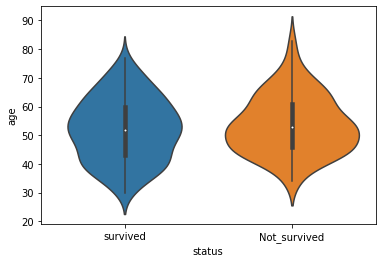

In [21]:
sns.violinplot(x = "status" , y = "age" , data = haberman_data)
plt.legend
plt.show()

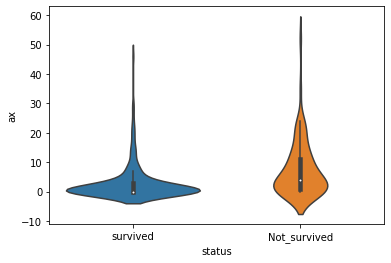

In [20]:
sns.violinplot(x = "status" , y = "ax" , data = haberman_data)
plt.legend
plt.show()

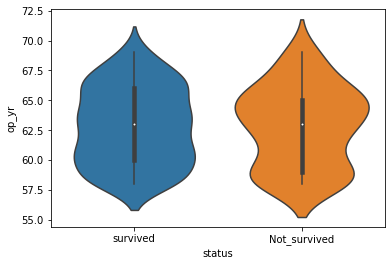

In [22]:
sns.violinplot(x = "status" , y = "op_yr" , data = haberman_data)
plt.legend
plt.show()

***Observation :*** Input your answer below

* 
* 

# Bivariate Analysis

C:\Users\Abdulkabir\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


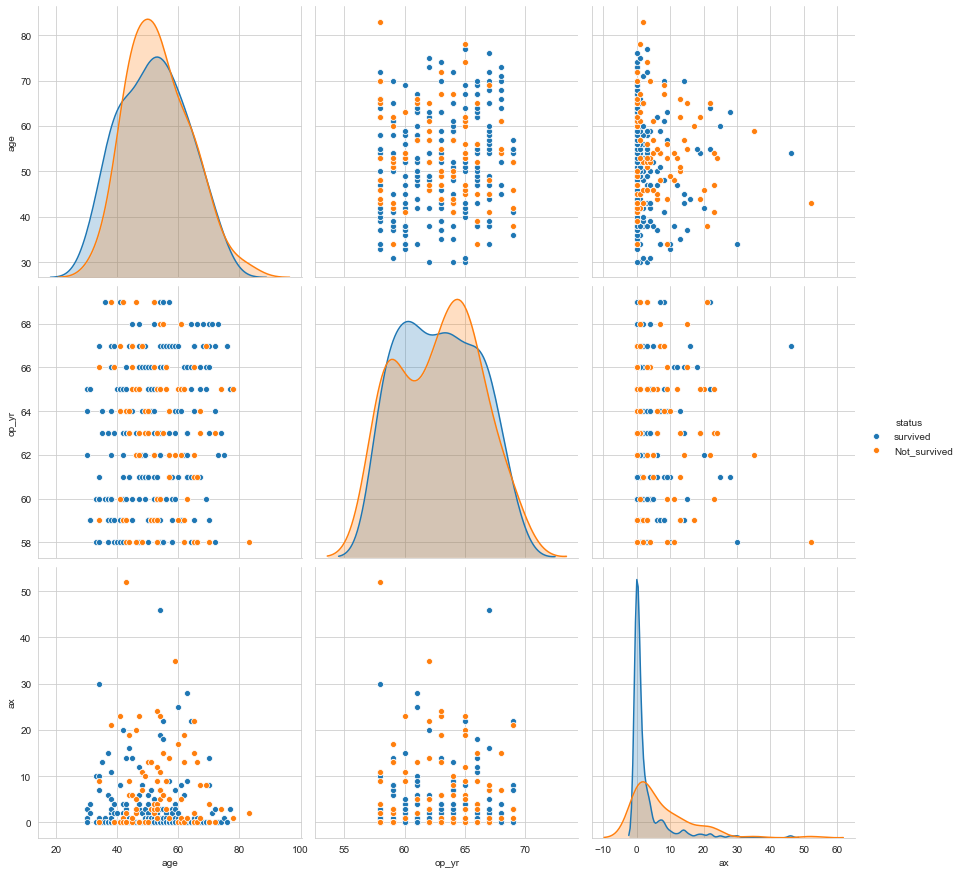

In [12]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman_data, hue = 'status',size = 4)
plt.show()

***Hint: Use FacetGrid***

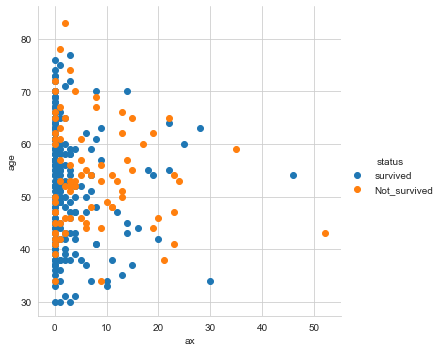

In [39]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_data, hue = 'status' , size = 5 )\
.map(plt.scatter, 'ax', 'age')\
.add_legend();
plt.show()

***Observation :*** Input your answer below

* as the ax increases,the survival and not_survival rate decreases.
* 

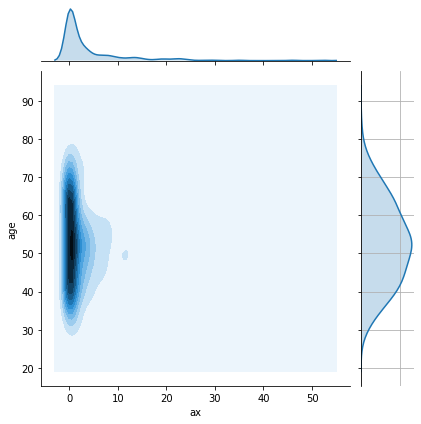

In [29]:
sns.jointplot(x = 'ax' , y = 'age' , data = haberman_data , kind = 'kde')
plt.grid()
plt.show()

***Observation :*** Input your answer below

* the density of point for ax is more from range 0 - 10 
* has the ax incereases the density reduces.
* 

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.